# Cycle Power Plant data set

The data consists of the following attrbiutes:
- Average Temperature (AT)
- Ambient Pressure (AP)
- Relative Humidity (RH)
- Exhaust Vaccum (V)
- Electrical Energy output of a Plant (PE) is the class variable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('Powerplant.csv')

In [3]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
data.tail()

,AT,V,AP,RH,PE
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


In [5]:
data.shape

(9568, 5)

In [6]:
data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


## Univariate and Bivariate Analysis

In [8]:
data.describe(include='all')

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [10]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


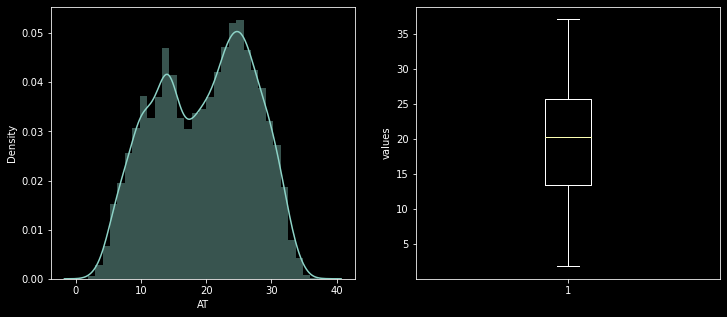

In [11]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.AT)
fig.add_subplot(1,2,2)
plt.boxplot(data.AT)
plt.ylabel('values')
plt.show()

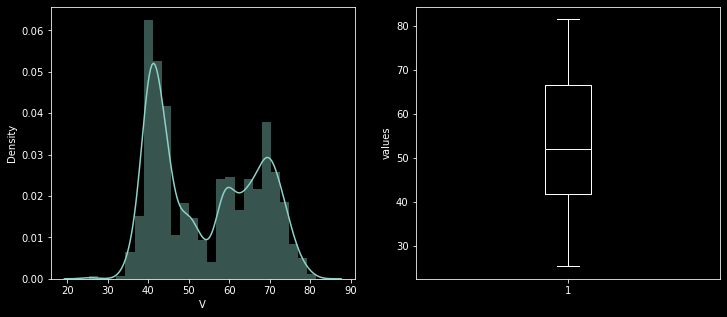

In [12]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.V)
fig.add_subplot(1,2,2)
plt.boxplot(data.V)
plt.ylabel('values')
plt.show()

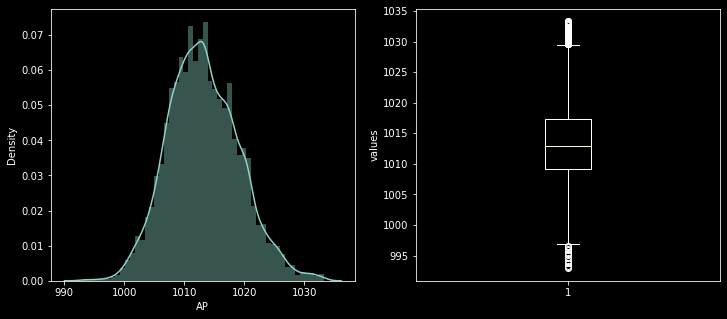

In [13]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.AP)
fig.add_subplot(1,2,2)
plt.boxplot(data.AP)
plt.ylabel('values')
plt.show()

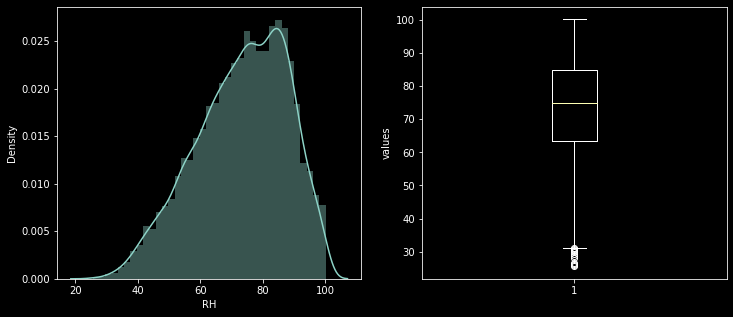

In [14]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.RH)
fig.add_subplot(1,2,2)
plt.boxplot(data.RH)
plt.ylabel('values')
plt.show()

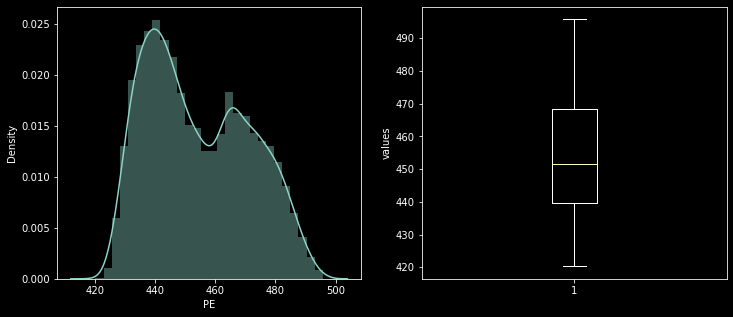

In [15]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.PE)
fig.add_subplot(1,2,2)
plt.boxplot(data.PE)
plt.ylabel('values')
plt.show()

<AxesSubplot:>

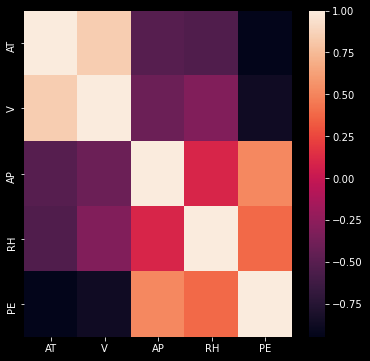

In [16]:
cor = data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)

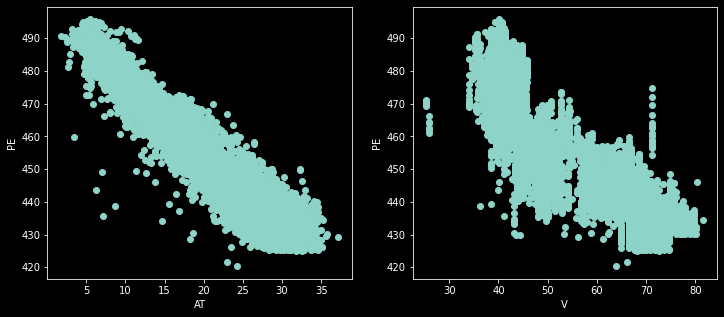

In [17]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
plt.scatter(data.AT, data.PE)
plt.ylabel('PE')
plt.xlabel('AT')
fig.add_subplot(1,2,2)
plt.scatter(data.V, data.PE)
plt.ylabel('PE')
plt.xlabel('V')
plt.show()

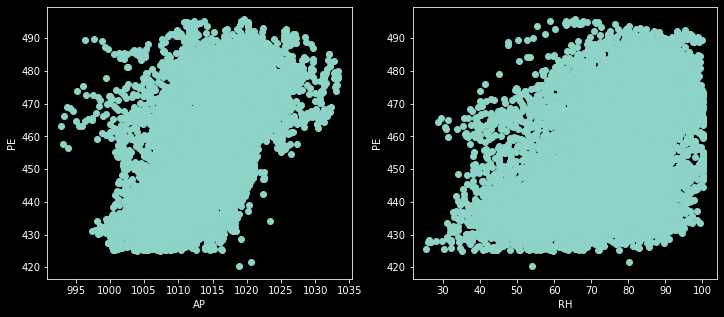

In [18]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
plt.scatter(data.AP, data.PE)
plt.ylabel('PE')
plt.xlabel('AP')
fig.add_subplot(1,2,2)
plt.scatter(data.RH, data.PE)
plt.ylabel('PE')
plt.xlabel('RH')
plt.show()

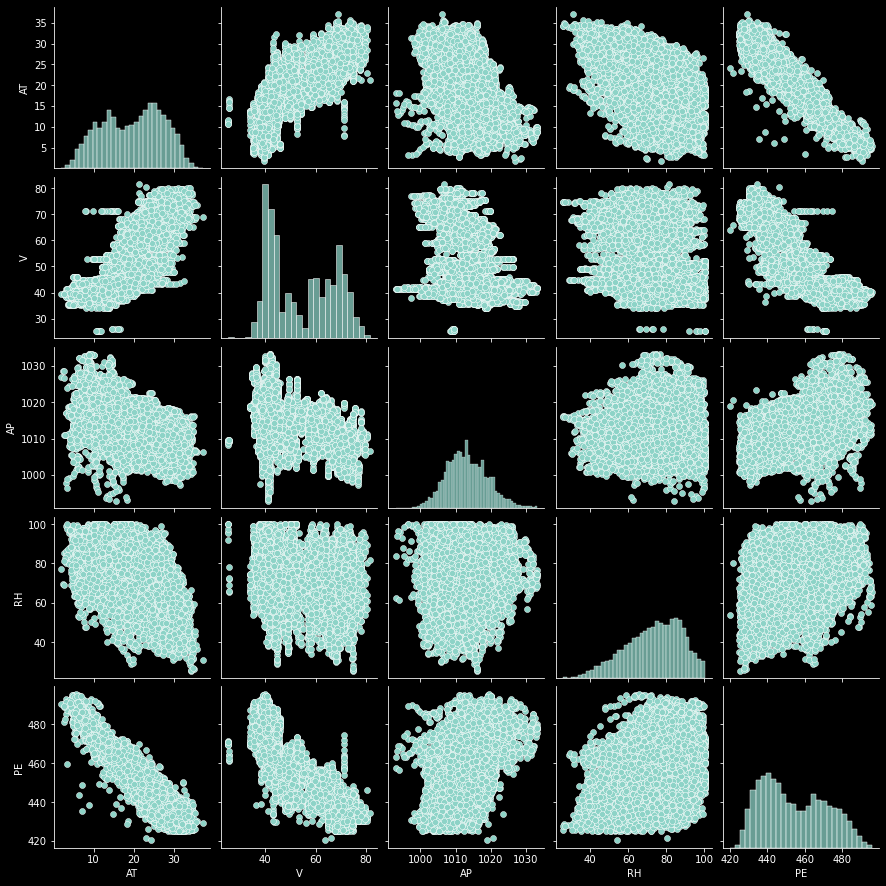

In [19]:
sns.pairplot(data)

In [20]:
X = data.drop(columns=['PE'])
Y = pd.DataFrame(data.PE)

In [21]:
X.shape

(9568, 4)

In [22]:
Y.shape

(9568, 1)

## Splitting the data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

In [25]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7176, 4), (2392, 4), (7176, 1), (2392, 1))

# Lasso Regression

In [100]:
X = data.drop(columns=['PE'])
Y = pd.DataFrame(data.PE)

In [101]:
X.shape

(9568, 4)

In [102]:
Y.shape

(9568, 1)

## Splitting the data

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

In [105]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7176, 4), (2392, 4), (7176, 1), (2392, 1))

## Creating the model

In [106]:
model = Lasso(random_state=42)

In [107]:
model.fit(X_train, Y_train)

Lasso(random_state=42)

In [108]:
Y_train_predict = model.predict(X_train)

In [109]:
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)
mse = mean_squared_error(Y_train, Y_train_predict)
mae = mean_absolute_error(Y_train, Y_train_predict)

In [110]:
print('MSE score on Training data is {}'.format(mse))
print('MAE score on Training data is {}'.format(mae))
print('RMSE score on Training data is {}'.format(rmse))
print('R2 score on Training data is {}'.format(r2))

MSE score on Training data is 21.068600113861724
MAE score on Training data is 3.647134909130909
RMSE score on Training data is 4.590054478310876
R2 score on Training data is 0.9279218238333109


In [111]:
Y_test_predict = model.predict(X_test)

In [112]:
rmse_test = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_test = r2_score(Y_test, Y_test_predict)
mse_test = mean_squared_error(Y_test, Y_test_predict)
mae_test = mean_absolute_error(Y_test, Y_test_predict)

In [113]:
print('MSE score on Test data is {}'.format(mse_test))
print('MAE score on Test data is {}'.format(mae_test))
print('RMSE score on Test data is {}'.format(rmse_test))
print('R2 score on Test data is {}'.format(r2_test))

MSE score on Test data is 20.150159480529204
MAE score on Test data is 3.5974737739590363
RMSE score on Test data is 4.4888929014322905
R2 score on Test data is 0.9300582893533962


In [114]:
print('Model Intercept is {}'.format(model.intercept_))
print('Model Coefficients are {}'.format(model.coef_))

Model Intercept is [470.80725883]
Model Coefficients are [-1.92347684 -0.25210902  0.04500538 -0.1433784 ]


## Hyper parameter Tuning

### fit _intercept

In [115]:
model = Lasso(fit_intercept=True, random_state=42)
model.fit(X_train, Y_train)

Lasso(random_state=42)

In [116]:
Y_test_predict = model.predict(X_test)

In [117]:
rmse_1 = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_1 = r2_score(Y_test, Y_test_predict)

In [118]:
print('RMSE score on Test Data with fit_intecept as True is {}'.format(rmse_1))
print('R2 score on Test Data with fit_intecept as True is {}'.format(r2_1))

RMSE score on Test Data with fit_intecept as True is 4.4888929014322905
R2 score on Test Data with fit_intecept as True is 0.9300582893533962


In [119]:
model = Lasso(fit_intercept=False, random_state=42)
model.fit(X_train, Y_train)

Lasso(fit_intercept=False, random_state=42)

In [120]:
Y_test_predict = model.predict(X_test)

In [121]:
rmse_2 = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_2 = r2_score(Y_test, Y_test_predict)

In [122]:
print('RMSE score on Test Data with fit_intecept as False is {}'.format(rmse_2))
print('R2 score on Test Data with fit_intecept as False is {}'.format(r2_2))

RMSE score on Test Data with fit_intecept as False is 4.953493882746067
R2 score on Test Data with fit_intecept as False is 0.9148311026958714


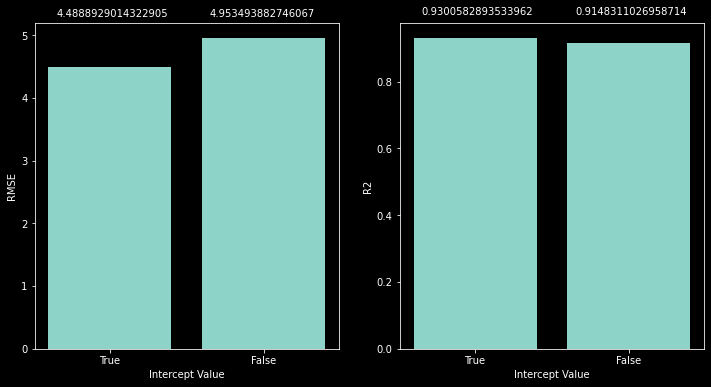

In [123]:
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(1,2,1)
plt.bar(['True','False'],[rmse_1, rmse_2])
xlocs, xlabs = plt.xticks()
plt.text(xlocs[0]-0.35, 5.3, str(rmse_1))
plt.text(xlocs[1]-0.35, 5.3, str(rmse_2))
plt.xlabel('Intercept Value')
plt.ylabel('RMSE')
fig.add_subplot(1,2,2)
plt.bar(['True','False'],[r2_1, r2_2])
xlocs, xlabs = plt.xticks()
plt.text(xlocs[0]-0.35, 1, str(r2_1))
plt.text(xlocs[1]-0.35, 1, str(r2_2))
plt.xlabel('Intercept Value')
plt.ylabel('R2')
plt.show()

### Normalize

In [124]:
model = Lasso(fit_intercept=True, normalize=True, random_state=42)
model.fit(X_train, Y_train)

Lasso(normalize=True, random_state=42)

In [125]:
Y_test_predict = model.predict(X_test)

In [126]:
rmse_1 = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_1 = r2_score(Y_test, Y_test_predict)

In [127]:
print('RMSE score on Test Data with normalize as True is {}'.format(rmse_1))
print('R2 score on Test Data with normalize as True is {}'.format(r2_1))

RMSE score on Test Data with normalize as True is 16.973566046472264
R2 score on Test Data with normalize as True is -9.099024773417952e-06


In [128]:
model = Lasso(fit_intercept=True, normalize=False, random_state=42)
model.fit(X_train, Y_train)

Lasso(random_state=42)

In [129]:
Y_test_predict = model.predict(X_test)

In [130]:
rmse_2 = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_2 = r2_score(Y_test, Y_test_predict)

In [131]:
print('RMSE score on Test Data with normalize as False is {}'.format(rmse_1))
print('R2 score on Test Data with normalize as False is {}'.format(r2_2))

RMSE score on Test Data with normalize as False is 16.973566046472264
R2 score on Test Data with normalize as False is 0.9300582893533962


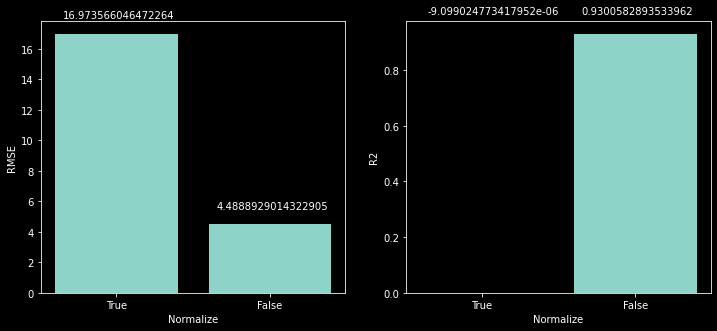

In [132]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
plt.bar(['True','False'],[rmse_1, rmse_2])
xlocs, xlabs = plt.xticks()
plt.text(xlocs[0]-0.35, 18, str(rmse_1))
plt.text(xlocs[1]-0.35, 5.5, str(rmse_2))
plt.xlabel('Normalize')
plt.ylabel('RMSE')
fig.add_subplot(1,2,2)
plt.bar(['True','False'],[r2_1, r2_2])
xlocs, xlabs = plt.xticks()
plt.text(xlocs[0]-0.35, 1, str(r2_1))
plt.text(xlocs[1]-0.35, 1, str(r2_2))
plt.xlabel('Normalize')
plt.ylabel('R2')
plt.show()

### Selection

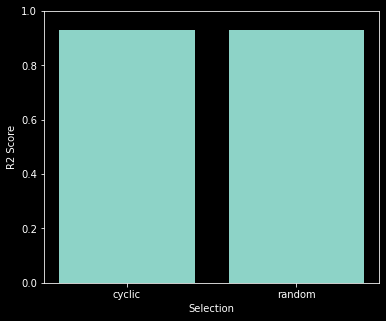

In [133]:
selection = ['cyclic', 'random']
so_score = []
for i in selection:
    model = Lasso(fit_intercept=True, normalize=False, selection=i, random_state=42)
    model.fit(X_train, Y_train)
    so_score.append(model.score(X_test, Y_test))
    
plt.figure(figsize=(6, 5))
plt.bar(selection, so_score)
plt.ylim(0,1)
plt.xlabel('Selection')
plt.ylabel('R2 Score')
plt.show()

In [134]:
max(so_score)

0.9300585520742605

In [135]:
so_score

[0.9300582893533962, 0.9300585520742605]

In [136]:
model = Lasso(fit_intercept=True, normalize=False, selection='random', random_state=42)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9300585520742605

### Max iteration

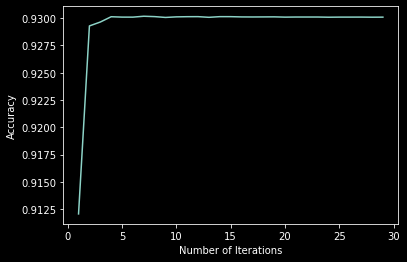

In [137]:
so_score = []
iter = []
for i in range(1, 30):
    model = Lasso(fit_intercept=True, normalize=False, selection='random',max_iter=i, random_state=42)
    model.fit(X_train, Y_train)
    so_score.append(model.score(X_test, Y_test))
    iter.append(i)

plt.plot(iter, so_score)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.show()

In [138]:
max(so_score)

0.9301817983113914

In [139]:
so_score.index(0.9301817983113914)

6

In [140]:
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, random_state=42)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9301817983113914

### Tol: Precision of the Solution

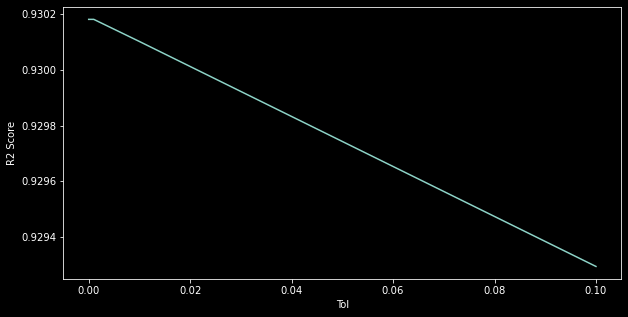

In [141]:
so_score = []
tol = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
for i in tol:
    model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=i, random_state=42)
    model.fit(X_train, Y_train)
    so_score.append(model.score(X_test, Y_test))

plt.figure(figsize=(10, 5))
plt.plot(tol, so_score)
plt.xlabel('Tol')
plt.ylabel('R2 Score')
plt.show()

In [142]:
max(so_score)

0.9301817983113914

In [143]:
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, random_state=42)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9301817983113914

### alpha

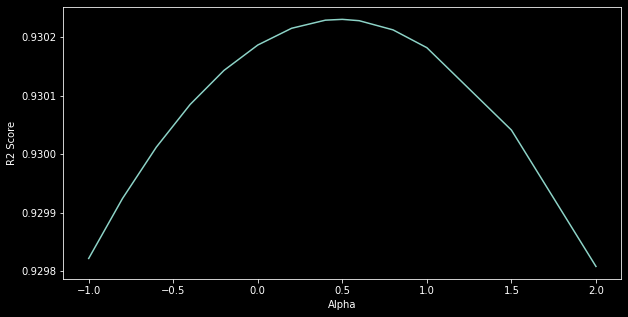

In [144]:
so_score = []
alpha = [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5, 2.0]
for i in alpha:
    model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=i, random_state=42)
    model.fit(X_train, Y_train)
    so_score.append(model.score(X_test, Y_test))

plt.figure(figsize=(10, 5))
plt.plot(alpha, so_score)
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [145]:
max(so_score)

0.9302302473408234

In [146]:
so_score.index(0.9302302473408234)

8

In [147]:
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, random_state=42)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9302302473408234

### positive

In [148]:
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = True, random_state=42)
model.fit(X_train, Y_train)

Lasso(alpha=0.5, max_iter=7, positive=True, random_state=42, selection='random')

In [149]:
Y_test_predict = model.predict(X_test)

In [150]:
rmse_1 = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_1 = r2_score(Y_test, Y_test_predict)

In [151]:
print('RMSE score on Test Data with positive coefficients only is {}'.format(rmse_1))
print('R2 score on Test Data with posotive coefficients only is {}'.format(r2_1))

RMSE score on Test Data with positive coefficients only is 13.314882025269524
R2 score on Test Data with posotive coefficients only is 0.38463554320270343


In [152]:
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
model.fit(X_train, Y_train)

Lasso(alpha=0.5, max_iter=7, random_state=42, selection='random')

In [153]:
Y_test_predict = model.predict(X_test)

In [154]:
rmse_2 = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_2 = r2_score(Y_test, Y_test_predict)

In [155]:
print('RMSE score on Test Data with positive and negative coefficients is {}'.format(rmse_2))
print('R2 score on Test Data with posotive and negative coefficients is {}'.format(r2_2))

RMSE score on Test Data with positive and negative coefficients is 4.48337133202039
R2 score on Test Data with posotive and negative coefficients is 0.9302302473408234


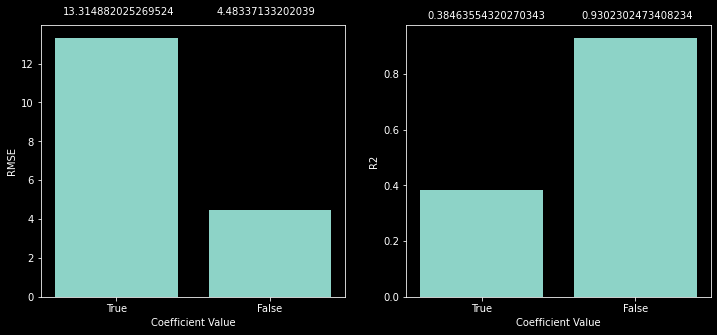

In [156]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
plt.bar(['True','False'],[rmse_1, rmse_2])
xlocs, xlabs = plt.xticks()
plt.text(xlocs[0]-0.35, 14.5, str(rmse_1))
plt.text(xlocs[1]-0.35, 14.5, str(rmse_2))
plt.xlabel('Coefficient Value')
plt.ylabel('RMSE')
fig.add_subplot(1,2,2)
plt.bar(['True','False'],[r2_1, r2_2])
xlocs, xlabs = plt.xticks()
plt.text(xlocs[0]-0.35, 1, str(r2_1))
plt.text(xlocs[1]-0.35, 1, str(r2_2))
plt.xlabel('Coefficient Value')
plt.ylabel('R2')
plt.show()

## Selecting Attributes

In [157]:
from itertools import combinations
col_number = []

### Selecting 1 column only

In [158]:
rmse_arr = []
r2_arr = []
col = []
for i in list(combinations(X.columns, 1)):
    i = list(i)
    col.append(i[0])
    model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
    model.fit(X_train.loc[:,i], Y_train)
    
    Y_test_predict = model.predict(X_test.loc[:,i]) 
    
    rmse_arr.append((np.sqrt(mean_squared_error(Y_test, Y_test_predict))))
    r2_arr.append(r2_score(Y_test, Y_test_predict))

In [159]:
col

['AT', 'V', 'AP', 'RH']

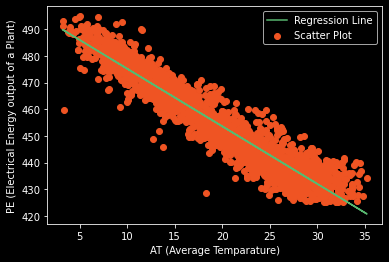

In [160]:
i = ['AT']
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
model.fit(X_train.loc[:,i], Y_train)
    
Y_test_predict = model.predict(X_test.loc[:,i]) 
    
plt.plot(X_test.loc[:,i], Y_test_predict, color='#58b970', label='Regression Line')
plt.scatter(X_test.loc[:,i], Y_test, c='#ef5423', label='Scatter Plot')

plt.xlabel('AT (Average Temparature)')
plt.ylabel('PE (Electrical Energy output of a Plant)')
plt.legend()
plt.show()

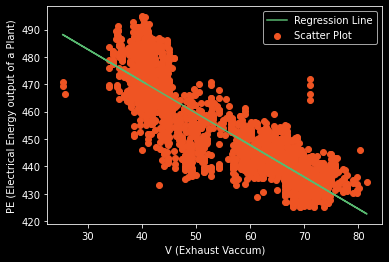

In [161]:
i = ['V']
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
model.fit(X_train.loc[:,i], Y_train)
    
Y_test_predict = model.predict(X_test.loc[:,i]) 
    
plt.plot(X_test.loc[:,i], Y_test_predict, color='#58b970', label='Regression Line')
plt.scatter(X_test.loc[:,i], Y_test, c='#ef5423', label='Scatter Plot')

plt.xlabel('V (Exhaust Vaccum)')
plt.ylabel('PE (Electrical Energy output of a Plant)')
plt.legend()
plt.show()

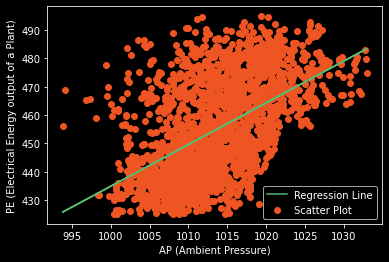

In [162]:
i = ['AP']
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
model.fit(X_train.loc[:,i], Y_train)
    
Y_test_predict = model.predict(X_test.loc[:,i]) 
    
plt.plot(X_test.loc[:,i], Y_test_predict, color='#58b970', label='Regression Line')
plt.scatter(X_test.loc[:,i], Y_test, c='#ef5423', label='Scatter Plot')

plt.xlabel('AP (Ambient Pressure)')
plt.ylabel('PE (Electrical Energy output of a Plant)')
plt.legend()
plt.show()

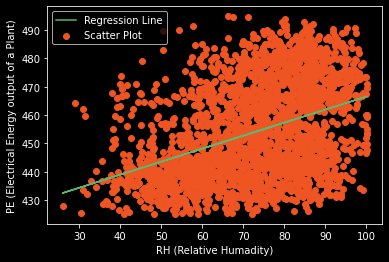

In [163]:
i = ['RH']
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
model.fit(X_train.loc[:,i], Y_train)
    
Y_test_predict = model.predict(X_test.loc[:,i]) 
    
plt.plot(X_test.loc[:,i], Y_test_predict, color='#58b970', label='Regression Line')
plt.scatter(X_test.loc[:,i], Y_test, c='#ef5423', label='Scatter Plot')

plt.xlabel('RH (Relative Humadity)')
plt.ylabel('PE (Electrical Energy output of a Plant)')
plt.legend()
plt.show()

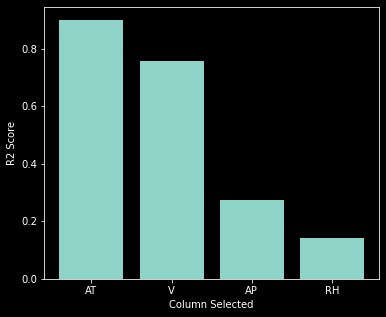

In [164]:
plt.figure(figsize=(6, 5))
plt.bar(col, r2_arr)
plt.xlabel('Column Selected')
plt.ylabel('R2 Score')
plt.show()

In [165]:
col_number.append(max(r2_arr))
max(r2_arr)

0.9001526438309047

### Selecting 2 columns

In [166]:
rmse_arr = []
r2_arr = []
col = []
for i in list(combinations(X.columns, 2)):
    i = list(i)
    col.append(str(i))
    model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
    model.fit(X_train.loc[:,i], Y_train)
    
    Y_test_predict = model.predict(X_test.loc[:,i]) 

    rmse_arr.append((np.sqrt(mean_squared_error(Y_test, Y_test_predict))))
    r2_arr.append(r2_score(Y_test, Y_test_predict))

In [167]:
col

["['AT', 'V']",
 "['AT', 'AP']",
 "['AT', 'RH']",
 "['V', 'AP']",
 "['V', 'RH']",
 "['AP', 'RH']"]

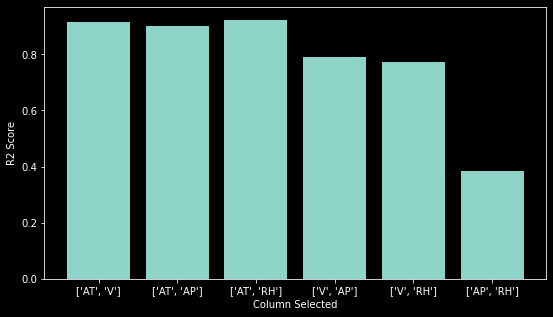

In [168]:
plt.figure(figsize=(9, 5))
plt.bar(col, r2_arr)
plt.xlabel('Column Selected')
plt.ylabel('R2 Score')
plt.show()

In [169]:
col_number.append(max(r2_arr))
max(r2_arr)

0.9224452560036063

### Selecting 3 columns

In [170]:
rmse_arr = []
r2_arr = []
col = []
for i in list(combinations(X.columns, 3)):
    i = list(i)
    col.append(str(i))
    model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
    model.fit(X_train.loc[:,i], Y_train)
    
    Y_test_predict = model.predict(X_test.loc[:,i]) 
    
    rmse_arr.append((np.sqrt(mean_squared_error(Y_test, Y_test_predict))))
    r2_arr.append(r2_score(Y_test, Y_test_predict))

In [171]:
col

["['AT', 'V', 'AP']",
 "['AT', 'V', 'RH']",
 "['AT', 'AP', 'RH']",
 "['V', 'AP', 'RH']"]

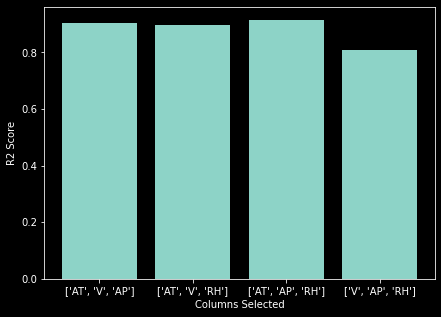

In [172]:
plt.figure(figsize=(7, 5))
plt.bar(col, r2_arr)
plt.xlabel('Columns Selected')
plt.ylabel('R2 Score')
plt.show()

In [173]:
col_number.append(max(r2_arr))
max(r2_arr)

0.9143291905957263

### Selecting 4 columns

In [174]:
rmse_arr = []
r2_arr = []
col = []
for i in list(combinations(X.columns, 4)):
    i = list(i)
    col.append(str(i))
    model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
    model.fit(X_train.loc[:,i], Y_train)
    
    Y_test_predict = model.predict(X_test.loc[:,i]) 
    
    rmse_arr.append((np.sqrt(mean_squared_error(Y_test, Y_test_predict))))
    r2_arr.append(r2_score(Y_test, Y_test_predict))

In [175]:
col

["['AT', 'V', 'AP', 'RH']"]

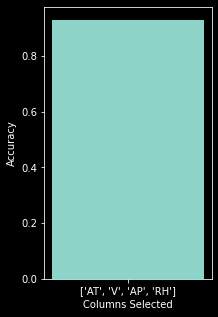

In [176]:
plt.figure(figsize=(3, 5))
plt.bar(col, r2_arr)
plt.xlabel('Columns Selected')
plt.ylabel('Accuracy')
plt.show()

In [177]:
col_number.append(max(r2_arr))
max(r2_arr)

0.9302302473408234

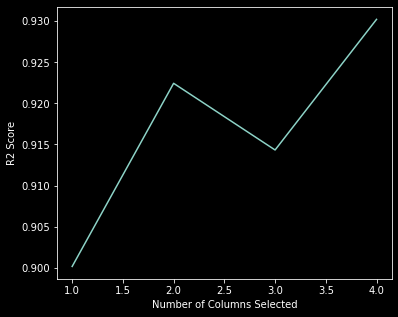

In [178]:
plt.figure(figsize=(6, 5))
plt.plot([1,2,3,4], col_number)
plt.xlabel('Number of Columns Selected')
plt.ylabel('R2 Score')
plt.show()

In [179]:
max(col_number)

0.9302302473408234

## Final model

In [180]:
model = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
model.fit(X_train, Y_train)

Lasso(alpha=0.5, max_iter=7, random_state=42, selection='random')

In [181]:
Y_test_predict = model.predict(X_test)

In [182]:
rmse_test = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_test = r2_score(Y_test, Y_test_predict)
mse_test = mean_squared_error(Y_test, Y_test_predict)
mae_test = mean_absolute_error(Y_test, Y_test_predict)

In [183]:
print('MSE score on Test data is {}'.format(mse_test))
print('MAE score on Test data is {}'.format(mae_test))
print('RMSE score on Test data is {}'.format(rmse_test))
print('R2 score on Test data is {}'.format(r2_test))

MSE score on Test data is 20.100618500782286
MAE score on Test data is 3.5860630907202182
RMSE score on Test data is 4.48337133202039
R2 score on Test data is 0.9302302473408234


In [184]:
model.coef_

array([-2.01982348, -0.21614884,  0.03966103, -0.16483396])

In [185]:
model.intercept_

array([477.73815193])

In [186]:
model.n_iter_

7

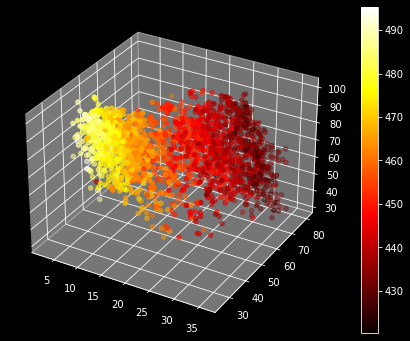

In [187]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = X_train.AT[:2000]
y = X_train.V[:2000]
z = X_train.RH[:2000]
c = Y_train.PE[:2000]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

Text(0.5, 1.0, 'Residuals Chart')

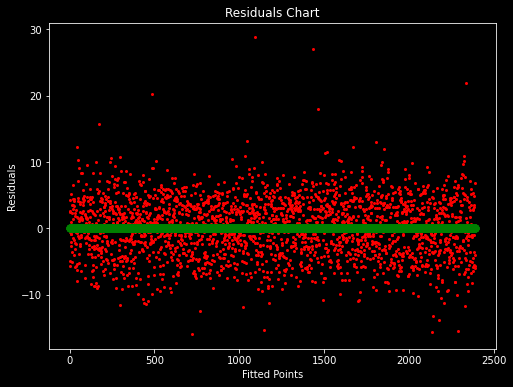

In [188]:
Y_test_predict = Y_test_predict.reshape(2392, 1)
difference = Y_test_predict - Y_test

k = range(0, len(difference))
l = [0 for i in range(len(difference))]

plt.figure(figsize=(8, 6))
plt.scatter(k, difference, color='Red', label='Residuals', s=4)
plt.scatter(k, l, color='green', label='Zero error', linewidth=2)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residuals Chart')

## Comparison

In [189]:
rmodel = Ridge(fit_intercept=True, normalize=False, solver='sag', max_iter=12, tol=0.0001, alpha=102.0, random_state=42)
rmodel.fit(X_train, Y_train)

Ridge(alpha=102.0, max_iter=12, random_state=42, solver='sag', tol=0.0001)

In [190]:
rY_test_predict = rmodel.predict(X_test)

In [191]:
rr2_test = r2_score(Y_test, rY_test_predict)

In [192]:
print('R2 score on Test data is {}'.format(rr2_test))

R2 score on Test data is 0.9303358932794389


In [193]:
lmodel = Lasso(fit_intercept=True, normalize=False, selection='random', max_iter=7, tol=0.0001, alpha=0.5, 
              positive = False, random_state=42)
lmodel.fit(X_train, Y_train)

Lasso(alpha=0.5, max_iter=7, random_state=42, selection='random')

In [194]:
lY_test_predict = lmodel.predict(X_test)

In [195]:
lr2_test = r2_score(Y_test, lY_test_predict)

In [196]:
print('R2 score on Test data is {}'.format(lr2_test))

R2 score on Test data is 0.9302302473408234


In [197]:
lmodel.coef_, lmodel.intercept_

(array([-2.01982348, -0.21614884,  0.03966103, -0.16483396]),
 array([477.73815193]))

In [198]:
rmodel.coef_, rmodel.intercept_

(array([[-1.97918366, -0.23334058,  0.05844184, -0.15816026]]),
 array([458.35441843]))

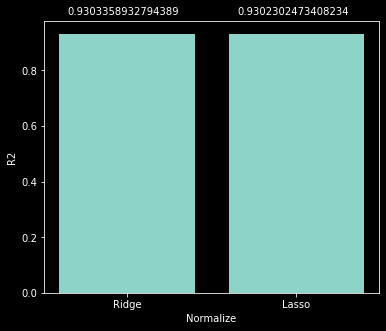

In [199]:
fig = plt.figure(figsize=(6, 5))
fig.add_subplot(1,1,1)
plt.bar(['Ridge','Lasso'],[rr2_test, lr2_test])
xlocs, xlabs = plt.xticks()
plt.text(xlocs[0]-0.35, 1, str(rr2_test))
plt.text(xlocs[1]-0.35, 1, str(lr2_test))
plt.xlabel('Normalize')
plt.ylabel('R2')
plt.show()

# Inference

We have uses Power Plant dataset for implementing Lasso Regression. The dataset has 5 columns and 9568 rows. We are using this data set to find the net hourly electrical energy output of the plant by using different attributes. We have done univariate and bivariate analysis to understand the data and relationship between different attributes. We have divided the data into train and test ratio with 75:25. We have done hyperparameter tuning to tune the algorithm and we get a r2 score of 0.93. We try to use different combination of columns and at last we can conclude that by using all 4 columns together gives us the best accuracy. The rmse and r2_score is visualized using bar chart and line chart for clear understanding. Normalization doesn't gives us better rmse score in this case. We have identified the coefficient and intercept value for the given problem which are (-2.01, -0.21,  0.03, -0.16) and 477.73815193.